# Loading and Exploring LAS Files with Python
## Introduction
Log ASCII Standard (LAS) files are a common Oil and Gas Industry format for storing and transferring well log data.

A LAS files is structured file format that was developed by Canadian well Logging Society in the late 1980s and early 1990s. It is used to store log curve data as well as information about the well. The format makes it simple to transfer well log data betweenpeople and it is easy to explore these files as they are stored within plain text.


## Loading and Checking Data

The first step is to import the required modules, pandas, matplotlib, and LASIO.

LASIO is a module that has been developed to handle and work with LAS files in python. More info can be found at: https://lasio.readthedocs.io/en/latest/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio


To load our file in, we can use the .read() method from lasio like;

In [2]:
las = lasio.read("../Data/inputs/KAMIAB-1.las")

In [3]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [4]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="1.2", descr="CWLS Log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

Now that our file has been loaded, we can start investigating it's contents.

To find information out about where the file originated from, such as the well name, location and what the depth range of the file covers, we can create a simple for loop to go over each header item. Using python's f-string we can join items together.

In [5]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}" )
     

 (STRT): 		 9.2653
 (STOP): 		 2301.1404
 (STEP): 		 0.125
 (NULL): 		 -999.25
COMPANY (COMP): 		 UNKNOWN
WELL (WELL): 		 KAMIAB-1
FIELD (FLD): 		 UNKNOWN
LOCATION (LOC): 		 UNKNOWN
COUNTY (CNTY): 		 UNKNOWN
STATE (STAT): 		 PUNJAB
COUNTRY (CTRY): 		 UNKNOWN
SERVICE COMPANY (SRVC): 		 UNKNOWN
LOG DATE (DATE): 		 UNKNOWN
UNIQUE WELL ID (UWI): 		 KAMIAB-1
SURFACE X (XCOORD): 		 0.0
SURFACE Y (YCOORD): 		 0.0
LATITUDE (LAT): 		 0.0
LONGITUDE (LON): 		 0.0
SURFACE ELEV (ELEV): 		 0.000 (type = KB)


We can see above that we have the key information about the well, such as the name and location.

If we wanted to change one of these enteries, for example, COUNTRY (CTRY), we can easily do that by using the following line of code.

In [6]:
las.sections['Well']['CTRY'] = "PAKISTAN"

In [7]:
for item in las.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}): \t\t {item.value}" )

 (STRT): 		 9.2653
 (STOP): 		 2301.1404
 (STEP): 		 0.125
 (NULL): 		 -999.25
COMPANY (COMP): 		 UNKNOWN
WELL (WELL): 		 KAMIAB-1
FIELD (FLD): 		 UNKNOWN
LOCATION (LOC): 		 UNKNOWN
COUNTY (CNTY): 		 UNKNOWN
STATE (STAT): 		 PUNJAB
COUNTRY (CTRY): 		 PAKISTAN
SERVICE COMPANY (SRVC): 		 UNKNOWN
LOG DATE (DATE): 		 UNKNOWN
UNIQUE WELL ID (UWI): 		 KAMIAB-1
SURFACE X (XCOORD): 		 0.0
SURFACE Y (YCOORD): 		 0.0
LATITUDE (LAT): 		 0.0
LONGITUDE (LON): 		 0.0
SURFACE ELEV (ELEV): 		 0.000 (type = KB)


We can now see that if we run the code above, the country value is updated.

We can also call upon the sections in a different way, in this case we can use las.well to call upon the well section.

If we just want to extract the well name, we can simply call it by the following code line;

In [8]:
las.well.WELL.value

'KAMIAB-1'

To quickly see the curve mnemonics are present within the las file, we can loop through las.curves and print the mnemonic.

In [9]:
for curve in las.curves:
    print(curve.mnemonic)

DEPTH
CALI
DRHO
DT
GR
IND
MCAL
MINV
MNOR
NPHI
PROX
RHOB
SN
SP


To see what curves are present within the las file. we can repeat the process with the curve item object and call upon the unit and descr functions to get into on the units and the curve's description. The enumerate function allows us to keep a count of the number of curves that are present within the file. As enumerate returns a 0 on the first loop, we need to 1 to it if we want to include depth curve.

In [10]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of : {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: Measured Depth
Curve: CALI, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: DRHO, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: DT, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: GR, 	 Units: API, 	 Description: v0 (auto-composite)
Curve: IND, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: MCAL, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: MINV, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: MNOR, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: NPHI, 	 Units: v/v_decimal, 	 Description: v0 (auto-composite)
Curve: PROX, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: RHOB, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: SN, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: SP, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
There are a total of : 14 curves present within this file


Curves can easily be removed from the LAS file. For Example, if we do no wish to retain SP curve, we can remove it like this:

In [11]:
# las.delete_curve("SN")
# las.delete_curve("RHOB")
# las.delete_curve("PROX")
las.delete_curve("MNOR")
las.delete_curve("MINV")
las.delete_curve("MCAL")
las.delete_curve("IND")
las.delete_curve("DT")
las.delete_curve("DRHO")
las.delete_curve("CALI")

In [12]:
# chek if the curve is deleted
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, \t Units: {curve.unit}, \t Description: {curve.descr}")
print(f"There are a total of : {count+1} curves present within this file")

Curve: DEPTH, 	 Units: M, 	 Description: Measured Depth
Curve: GR, 	 Units: API, 	 Description: v0 (auto-composite)
Curve: NPHI, 	 Units: v/v_decimal, 	 Description: v0 (auto-composite)
Curve: PROX, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: RHOB, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: SN, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
Curve: SP, 	 Units: UNKNOWN, 	 Description: v0 (auto-composite)
There are a total of : 7 curves present within this file


In [13]:
las.write('../Data/outputs/KAMIAB-1-Exported.las')

# Converting LAS file to a Pandas Dataframe

DAta loaded in using LASIO can be converted to a pandas dataframe using the .df() function. This allows us to eaily plot data and pass it into one of the many machine learning algorithms.

In [14]:
well = las.df()

In [15]:
well.head()

,GR,NPHI,PROX,RHOB,SN,SP
DEPTH,,,,,,
9.2653,27.5780,NaN,NaN,NaN,NaN,NaN
9.3903,27.5780,NaN,NaN,NaN,NaN,NaN
9.5153,27.5806,NaN,NaN,NaN,NaN,NaN
9.6403,27.5745,NaN,NaN,NaN,NaN,NaN
9.7653,27.5574,NaN,NaN,NaN,NaN,NaN


In [16]:
well.describe()

,GR,NPHI,PROX,RHOB,SN,SP
count,18263.000000,3139.000000,5584.000000,17069.000000,17032.000000,17117.000000
mean,52.832571,33.345659,11.116542,2.192346,10.054238,-0.832439
std,21.590781,9.090388,24.451676,0.156297,6.429005,4.864512
min,3.453900,-0.106600,0.264600,1.397000,0.577700,-14.459400
25%,41.271550,28.091450,3.063200,2.098000,4.701925,-5.217400
50%,54.457700,33.887000,5.956900,2.160400,7.363000,-1.198000
75%,65.339100,40.038850,16.395375,2.277600,15.616950,4.248900
max,141.403700,54.576200,1060.731000,2.755900,37.235400,9.282800


In [17]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18336 entries, 9.2653 to 2301.1404
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GR      18263 non-null  float64
 1   NPHI    3139 non-null   float64
 2   PROX    5584 non-null   float64
 3   RHOB    17069 non-null  float64
 4   SN      17032 non-null  float64
 5   SP      17117 non-null  float64
dtypes: float64(6)
memory usage: 1002.8 KB


# QUICK PLOT

using the plotting function within pandas, we can plot all curves on a single plot.

<AxesSubplot:xlabel='DEPTH'>

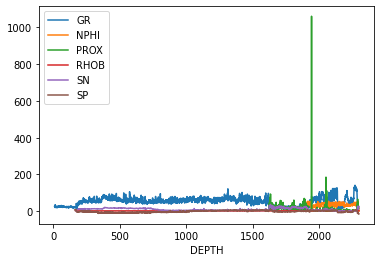

In [18]:
well.plot()

When we look at the plot above, we can see that is not very useful to us as all logging measurements have their own scales. We can see the NPHI, is not well plotted. We can plot individual curves by applying a y variable argument like:

<AxesSubplot:xlabel='DEPTH'>

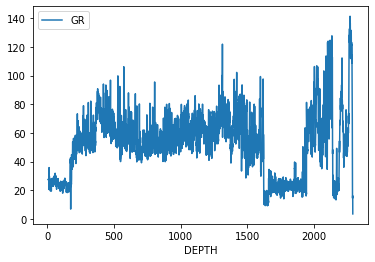

In [19]:
well.plot(y="GR")

This allows us to view the Gamma Ray Curve on it own. We can change the variable to any other curve within the dataframe and view it as follows.


<AxesSubplot:xlabel='DEPTH'>

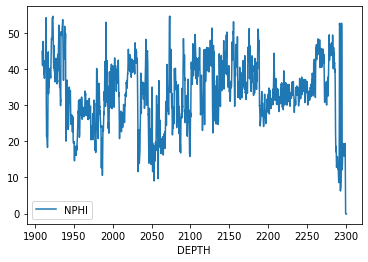

In [20]:

well.plot(y="NPHI")

## Summary
We have seen how to load, explore and visually see the LAS Files Data.

Author : Dilshad Raza\
Date Created: 07/10/2022